# Curso de CNN con PyTorch

<img src="https://yaelmanuel.com/wp-content/uploads/2021/12/platzi-banner-logo-matematicas.png" width="500px">

---

## 1) 🎯 Álgebra Lineal para CNNs

Recordar operaciones esenciales del álgebra lineal que sustentan el funcionamiento de las Redes Neuronales Convolucionales (CNNs).


## 2) 📐 Fundamento Matemático

### 2.1) ¿Qué es un tensor?

Un **tensor** es una generalización de los escalares (0D), vectores (1D) y matrices (2D) a dimensiones mayores.
  
| Tipo       | Ejemplo                        | Dimensiones |
|------------|--------------------------------|-------------|
| Escalar    | `x = 3.14`                     | 0D          |
| Vector     | `x = [1, 2, 3]`                | 1D          |
| Matriz     | `x = [[1, 2], [3, 4]]`         | 2D          |
| Tensor 3D+ | `x = [[[...]]]` (imagen RGB)   | 3D, 4D...    |


In [ ]:
#!pip3 install torch torchvision torchaudio

In [ ]:
import torch

In [ ]:
# Escalar
esc = torch.tensor(3.14)
print(esc)

tensor(3.1400)


In [ ]:
# Vector
vec = torch.tensor([1, 2, 3])
print(vec)

tensor([1, 2, 3])


In [ ]:
# Matriz
mat = torch.tensor([[1, 2], [3, 4]])
print(mat)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# Tensor 3D (imagen RGB: CxHxW)
img_rgb = torch.randn(3, 64, 64)
print(img_rgb)

tensor([[[ 0.8884,  0.0856,  0.6609,  ...,  1.0896, -0.7463,  0.5082],
         [-0.5689, -0.6789, -0.0417,  ...,  0.6195,  0.7829, -0.6594],
         [ 1.9755,  0.3629,  0.6208,  ...,  0.9525, -2.4363,  0.2867],
         ...,
         [ 1.0035,  1.8332, -0.2112,  ...,  0.0745,  0.1971,  0.7951],
         [-0.0377, -0.8968,  1.0528,  ...,  0.5906,  0.4934, -1.3136],
         [ 0.8782, -0.4199,  0.3351,  ..., -0.9982,  0.2686,  1.0900]],

        [[ 0.6859, -0.7829,  0.0819,  ...,  0.4330,  0.0069, -0.4629],
         [-1.1867,  0.2058, -0.5493,  ..., -1.2739,  0.8453, -0.1172],
         [-1.1038, -0.9854,  1.6740,  ..., -0.3729,  1.0280, -1.5041],
         ...,
         [ 1.0712,  0.1479,  1.4642,  ..., -1.3730,  0.8357,  1.5844],
         [-1.2154, -0.4011,  0.1813,  ..., -0.2017,  0.2630, -1.8688],
         [ 0.2236, -0.5128,  0.2877,  ...,  0.4229, -0.9911, -1.5308]],

        [[-1.6617,  0.7162,  0.7891,  ...,  0.6542, -1.0503, -0.5001],
         [-0.4250,  1.1744,  1.2965,  ...,  0

### 2.2) Producto Punto

El **producto punto** (dot product) es una operación fundamental para calcular activaciones y similitudes.

$$
\text{dot}(a, b) = \sum_{i=1}^{n} a_i \cdot b_i
$$

In [ ]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

dot = torch.dot(a, b)

print("Producto punto:", dot.item())  # 1*4 + 2*5 + 3*6 = 32

Producto punto: 32.0


### 2.3) Conexión con Convoluciones

Esta base de **álgebra lineal** es fundamental porque:

- **Cada convolución es una suma de productos punto locales.**
- **Los filtros son pequeños vectores o matrices que se multiplican contra regiones locales.**
- **La optimización (backpropagation) ajusta estos pesos usando derivadas, que también se basan en producto punto.**

### 2.4) Convolución como operación lineal

Una **convolución** es una operación lineal local. Aplicamos un **filtro (kernel)** sobre regiones de entrada, calculando productos punto locales:

$$
\text{Output}_{(i,j)} = \sum_{u,v} \text{Input}_{(i+u,\,j+v)} \cdot \text{Kernel}_{(u,v)}
$$



**Visualmente, en una entrada 2D:**

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Imagen simple: letra P
P_img = np.zeros((64, 64))
P_img[10:50, 10:20] = 1
P_img[10:20, 10:40] = 1
P_img[30:40, 10:40] = 1
P_img[20:30, 30:40] = 1
P_img[20:30, 20:30] = 0
img_P = torch.tensor(P_img, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

In [ ]:
# Filtro Sobel vertical
kernel = torch.tensor([[-1., -2., -1.],
                       [ 0.,  0.,  0.],
                       [ 1.,  2.,  1.]]).unsqueeze(0).unsqueeze(0)

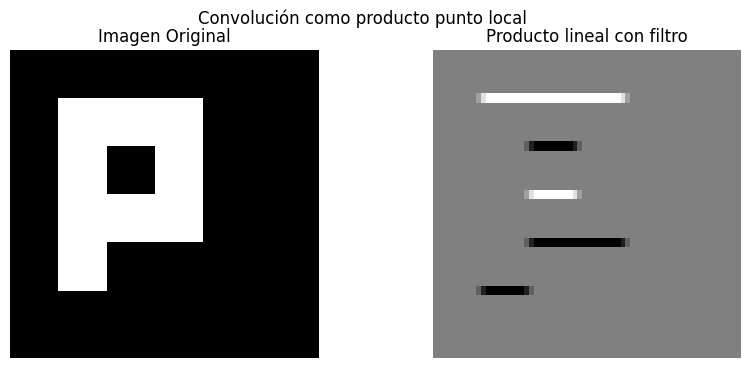

In [ ]:
# Nota: El padding=1 introduce una banda de ceros alrededor de la imagen original para que el mapa resultante tenga el mismo tamaño que la entrada.
output = F.conv2d(img_P, kernel, padding=1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(P_img.squeeze(), cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output.squeeze().detach(), cmap='gray')
plt.title("Producto lineal con filtro")
plt.axis('off')
plt.suptitle("Convolución como producto punto local")
plt.show()


**Convolución más detallada**


In [ ]:
np.set_printoptions(threshold=np.inf, linewidth=200)
print(P_img.astype(int))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
# Coordenadas del centro (recordar a contar desde 0)
i, j = 10, 10

window = img_P.squeeze().cpu().numpy()[i-1:i+2, j-1:j+2]
print(f"Ventana 3x3 centrada en ({i},{j}):")
print(window)

Ventana 3x3 centrada en (10,10):
[[0. 0. 0.]
 [0. 1. 1.]
 [0. 1. 1.]]


### 🧠 Ejemplo de operación de convolución

Tomemos la siguiente región 3×3 de la imagen:

**Input**:

$$
\begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & 1 \\
0 & 1 & 1
\end{bmatrix}
$$

**Kernel (Sobel vertical)**:

$$
\begin{bmatrix}
-1 & -2 & -1 \\
 0 &  0 &  0 \\
 1 &  2 &  1
\end{bmatrix}
$$

**Cálculo del producto punto local**:

$$
(-1)\cdot 0 \;+\; (-2)\cdot 0 \;+\; (-1)\cdot 0\;+\; 0\cdot 0\;+\; 0\cdot 1\;+\; 0\cdot 1\;+\; 1\cdot 0\;+\; 2\cdot 1\;+\; 1\cdot 1
$$

$$
= 0 + 0 + 0 + 0 + 0 + 0 + 0 + 2 + 1 = 3
$$

**Resultado final**: `3`



In [ ]:
# 1) Convertir 'output' a NumPy 2D (sacando batch y channel)
out_np = output.squeeze().detach().cpu().numpy()

# 2) Configurar numpy para imprimir todo el array sin cortes y en una sola línea
np.set_printoptions(threshold=np.inf, linewidth=200)

# 3) Imprimir como enteros, sin comas, de forma prolija
print(out_np.astype(int))

# 3) Verificar el valor en (i, j)
i, j = 10, 10
print(f"\nValor en la posición ({i},{j}):", out_np[i, j])

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

### 2.5) Dimensiones y transformaciones

En redes convolucionales usamos tensores con forma:

```python
(batch_size, channels, height, width)  # ➜ Ejemplo: (1, 3, 64, 64)
```

- `batch_size`: cantidad de imágenes procesadas juntas.
- `channels`: 1 (grayscale), 3 (RGB), o más.
- `height`, `width`: tamaño espacial de la imagen.

## 3) 💡 Tips

- **Entender tensores y sus dimensiones** es clave para evitar errores al construir arquitecturas.
- Muchas veces, errores de "shape" se deben a mal uso del batch o canales. Siempre inspeccioná con `tensor.shape`.
- Pensar las convoluciones como productos punto ayuda a entender qué hacen los filtros y cómo se ajustan.


In [27]:
!pip install pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg


# Imágenes DICOM.

In [30]:
import pydicom
import matplotlib.pyplot as plt

# Read the DICOM file
ds = pydicom.dcmread('p-000.dcm')

# Extract the pixel data
pixel_array = ds.pixel_array

# Show the image
plt.figure(figsize=(10, 8))
plt.imshow(pixel_array, cmap=plt.cm.bone)
plt.title('DICOM Image')
plt.axis('off')
plt.show()

RuntimeError: Unable to decompress 'JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])' pixel data because all plugins are missing dependencies:
	gdcm - requires gdcm>=3.0.10
	pylibjpeg - requires pylibjpeg>=2.0 and pylibjpeg-libjpeg>=2.1